# US School Analysis

## Start with imports and reading in your data

In [1]:
# Include all your imports here
import pandas as pd
from pathlib import Path
import seaborn as sns


In [2]:
# Load the Public school dataset
file = "public_school_data.csv"
data = pd.read_csv(file)

In [3]:
# Load the Public school locations dataset
file = "public_school_locations.csv"
locations = pd.read_csv(file)


In [4]:
# Load the Public school data dictionary file
file = "school_data_dictionary.csv"
dictionary = pd.read_csv(file)


## Data Exploration and Preparation

In [5]:
# Use an .isin() function to keep only fields that appear in the main public_school_data.csv and identify the unique id column 

dictionary = dictionary[dictionary["Fields"].isin(data.columns)]
dictionary

,Fields,Field Descriptions
2,NCESSCH,Unique School ID
12,LSTATE,Location state
21,SCHOOL_LEVEL,School level
25,SCHOOL_TYPE_TEXT,School type (description)
51,TOTAL,Total students all grades (includes AE)
53,FTE,Total Teachers
54,STUTERATIO,Student teacher ratio
57,AM,All Students - American Indian/Alaska Native
60,AS,All Students - Asian
63,BL,All Students - Black or African American


In [6]:
# Ensure the column you selected is indeed a unique identifier by checking the number of uniqe values and comparing it to the number of rows in the dataframe
# check unique values in NCESSCH column of "data"

data_ID_count = len(pd.unique(data['NCESSCH']))
data_row_count = len(data)
location_ID_count = len(pd.unique(locations['ID']))
locations_row_count = len(locations)

print("data unique ID's:", data_ID_count, "data rows:", data_row_count, '\n'
      "locations unique ID's:",  location_ID_count, "locations rows:", locations_row_count)


data unique ID's: 100722 data rows: 100722 
locations unique ID's: 100722 locations rows: 100722


In [7]:
# Change the names of the unique ID column in both the location data and public school data to match and set them as index

data = data.rename(columns={'NCESSCH' : 'school_id',
                             'LSTATE' : 'state',
                             'SCHOOL_LEVEL' : 'school_level',
                             'SCHOOL_TYPE_TEXT' : 'school_type',
                             'TOTAL' : 'total_students',
                             'FTE' : 'teachers',
                             'STUTERATIO' : 'student_teacher_ratio',
                             'AM' : 'native',
                             'AS' : 'asian',
                             'BL' : 'black',
                             'HP' : 'pacific',
                             'HI' : 'hispanic',
                             'TR' : 'multi',
                             'WH' : 'white'
                            }
                   ).set_index("school_id")
           
locations = locations.rename(columns=
                             {'ID' : 'school_id',
                              'LATCOD': 'lat',
                              'LONCOD': 'long'
                             }
                            ).set_index("school_id")
                



In [8]:
# Check your work
data.head()

,state,school_level,school_type,total_students,teachers,student_teacher_ratio,native,asian,black,pacific,hispanic,multi,white
school_id,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0


In [9]:
# Check your work
locations.head()

,lat,long
school_id,,
10000500870,34.2602,-86.206200
10000500871,34.2622,-86.204900
10000500879,34.2733,-86.220100
10000500889,34.2527,-86.221806
10000501616,34.2898,-86.193300


In [10]:
# Join the location and data dataframes together
data_w_location = pd.concat([data , locations], axis = 1)

In [11]:
# Get the value counts for the school type column
data_w_location['school_type'].value_counts()

Regular school                  91595
Alternative Education School     5588
Special education school         1946
Career and Technical School      1593
Name: school_type, dtype: int64

In [12]:
# Create a subset of the dataframe that only includes regular schools ensure it was successful by comparing rows in the subset to the value counts above
regular_schools = data_w_location[data_w_location['school_type'] == "Regular school"]
len(regular_schools)

91595

## Data Cleaning and dealing with nulls

In [13]:
# Check for nulls and determine the best approach for dealing with them
regular_schools.isnull().sum()

state                        0
school_level                 0
school_type                  0
total_students             868
teachers                  6653
student_teacher_ratio      532
native                   22158
asian                    11894
black                     7059
pacific                  32405
hispanic                  2257
multi                     4972
white                     2368
lat                          0
long                         0
dtype: int64

In [14]:
# Fill some of the columns with 0 where it makes sense

nulls_by_race = {'native': 0, 'asian': 0, 'black': 0, 'pacific': 0, 'hispanic': 0, 'multi': 0, 'white': 0}
regular_schools = regular_schools.fillna(value=nulls_by_race)

In [15]:
# Verify changes to nulls and prepare to drop na

regular_schools.isnull().sum()

state                       0
school_level                0
school_type                 0
total_students            868
teachers                 6653
student_teacher_ratio     532
native                      0
asian                       0
black                       0
pacific                     0
hispanic                    0
multi                       0
white                       0
lat                         0
long                        0
dtype: int64

In [16]:
# Drop remaining nulls wher it would make sense
regular_schools = regular_schools.dropna(axis = 0, how = 'any')


In [17]:
# Verify changes to nulls and no nulls should remain
regular_schools.isnull().sum()


state                    0
school_level             0
school_type              0
total_students           0
teachers                 0
student_teacher_ratio    0
native                   0
asian                    0
black                    0
pacific                  0
hispanic                 0
multi                    0
white                    0
lat                      0
long                     0
dtype: int64

## Plotting to help Clean the Data

<AxesSubplot:title={'center':'Total Students'}, ylabel='Frequency'>

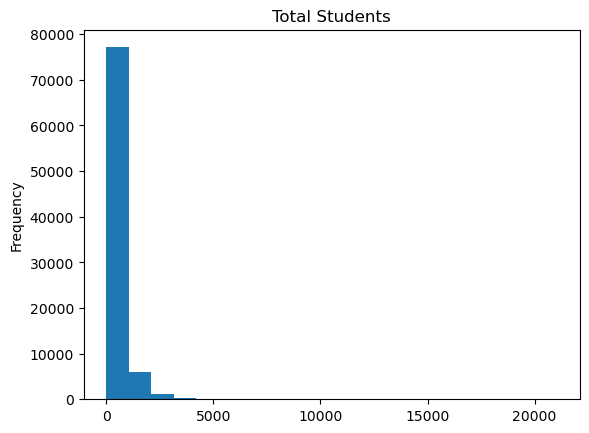

In [18]:
# Plot a histogram of Total enrolled students and check for outliers
regular_schools['total_students'].plot(kind = 'hist', bins = 20, title = 'Total Students')

<AxesSubplot:title={'center':'Total Students'}>

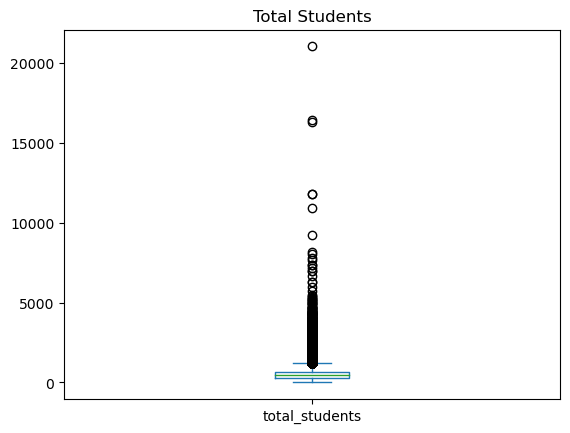

In [19]:
regular_schools['total_students'].plot(kind = 'box', title = 'Total Students')

<AxesSubplot:title={'center':'Teachers'}, ylabel='Frequency'>

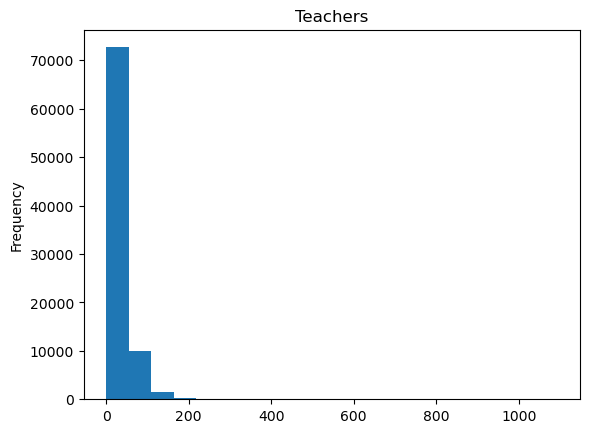

In [20]:
# Plot a histogram of Total Teachers and check for outliers
regular_schools['teachers'].plot(kind = 'hist', bins = 20, title = 'Teachers')

<AxesSubplot:title={'center':'Teachers'}>

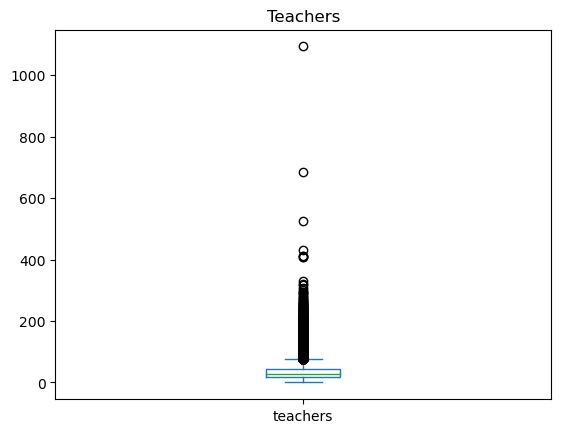

In [21]:
regular_schools['teachers'].plot(kind = 'box', title = 'Teachers')

<AxesSubplot:title={'center':'Student-Teacher Ratio'}, ylabel='Frequency'>

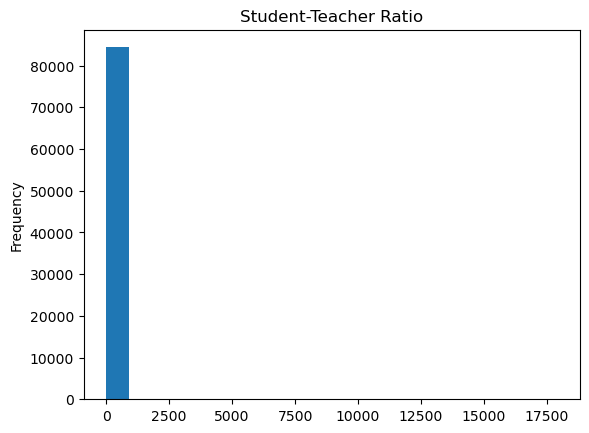

In [22]:
# Plot a histogram of Student Teacher Ratio and check for outliers
regular_schools['student_teacher_ratio'].plot(kind = 'hist', bins = 20, title = 'Student-Teacher Ratio')

<AxesSubplot:title={'center':'Student-Teacher Ratio'}>

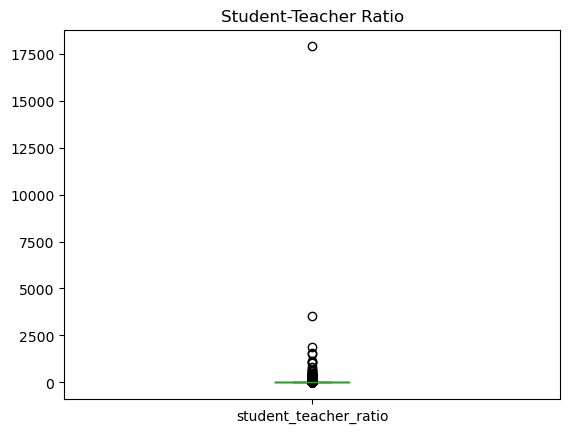

In [23]:
regular_schools['student_teacher_ratio'].plot(kind = 'box', title = 'Student-Teacher Ratio')

<AxesSubplot:title={'center':'Total Students'}, ylabel='Frequency'>

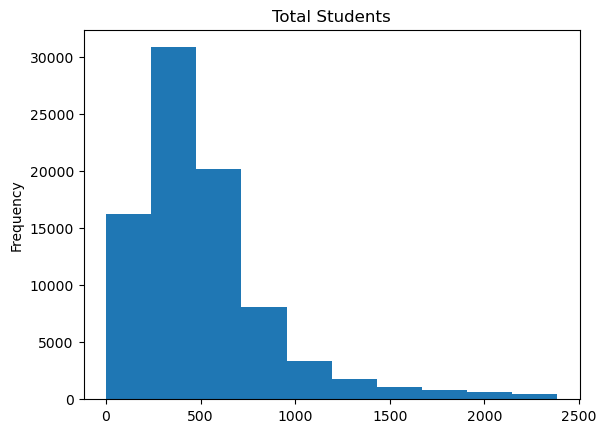

In [24]:
# Re-Plot a histogram of Total enrolled students after removing 0s and outliers above the 99th quantile
# Drop rows where Total students <= 0

q_high = regular_schools['total_students'].quantile(0.99)

# For 'total_students' and 'teachers' I will extract a series for analysis
filter_students = regular_schools['total_students'][
    (regular_schools['total_students'] <= q_high) & 
    (regular_schools['total_students'] > 0)
]

filter_students.plot(kind = 'hist',title = 'Total Students',)
                                    

<AxesSubplot:title={'center':'Total Students'}>

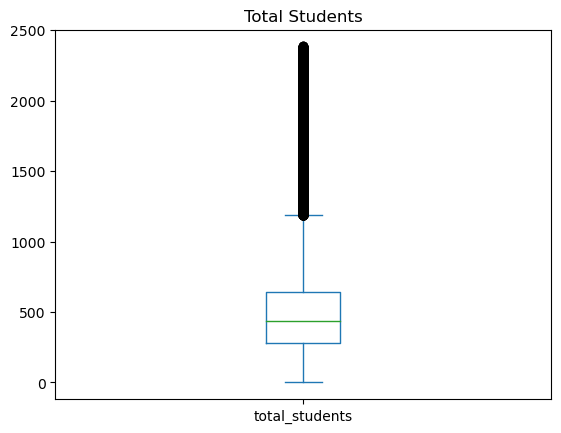

In [25]:
filter_students.plot(kind = 'box',title = 'Total Students',)

<AxesSubplot:title={'center':'Teachers'}, ylabel='Frequency'>

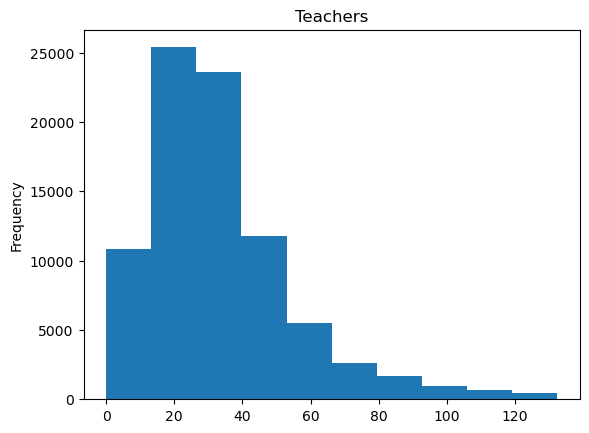

In [26]:
# Re-Plot a histogram of Total Teachers after removing 0s and outliers above the 99th quantile

q_high = regular_schools['teachers'].quantile(0.99)
filter_teachers = regular_schools['teachers'][
    (regular_schools['teachers'] <= q_high) & 
    (regular_schools['teachers'] > 0)
]
filter_teachers.plot(kind = 'hist',title = 'Teachers',)



<AxesSubplot:title={'center':'Teachers'}>

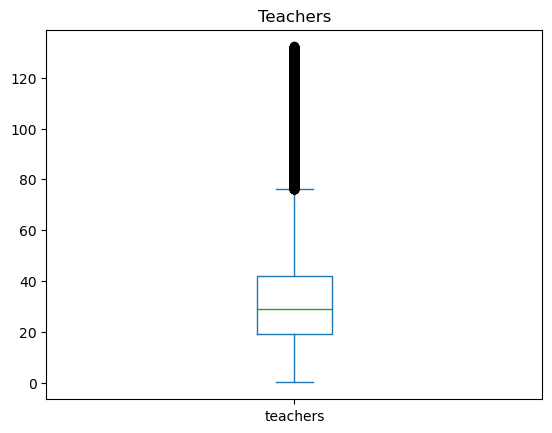

In [27]:
filter_teachers.plot(kind = 'box',title = 'Teachers',)

<AxesSubplot:title={'center':'Student-Teacher Ratio'}, ylabel='Frequency'>

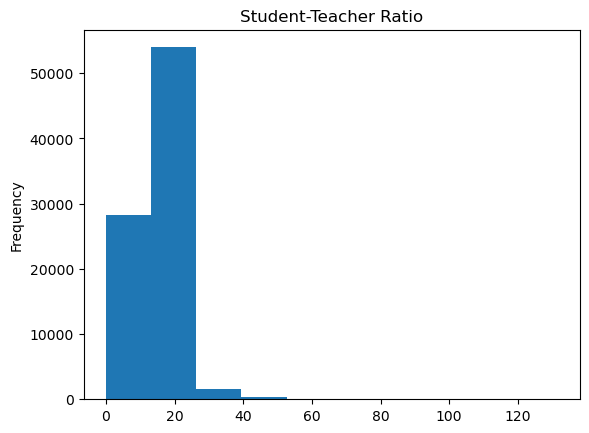

In [28]:
# Re-Plot a histogram of Student Teacher Ratio after removing 0s and outliers above the 99th quantile
# For this histogram I will save changes to regular_schools dataframe for use in analysis below

qhigh = regular_schools['student_teacher_ratio'].quantile(0.99)

# For 'student-teacher-ratio', I will create a new full dataframe for use in analysis below
regular_shools_strfilter = regular_schools[
    (regular_schools['student_teacher_ratio'] <= q_high) & 
    (regular_schools['student_teacher_ratio'] > 0)
]

regular_shools_strfilter['student_teacher_ratio'].plot(kind = 'hist',title = 'Student-Teacher Ratio',)



<AxesSubplot:title={'center':'Student-Teacher Ratio'}>

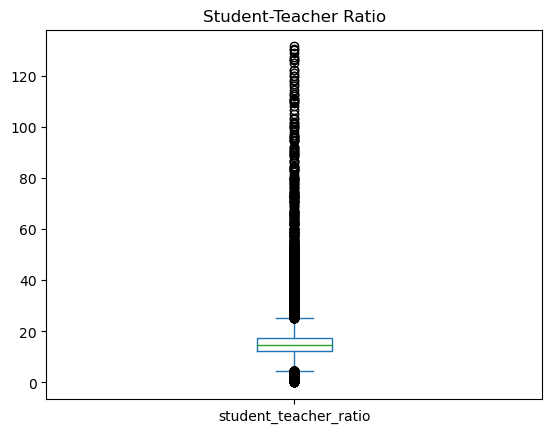

In [29]:
regular_shools_strfilter['student_teacher_ratio'].plot(kind = 'box',title = 'Student-Teacher Ratio')

## Correlation Plot to Understand Data Relationships

<AxesSubplot:>

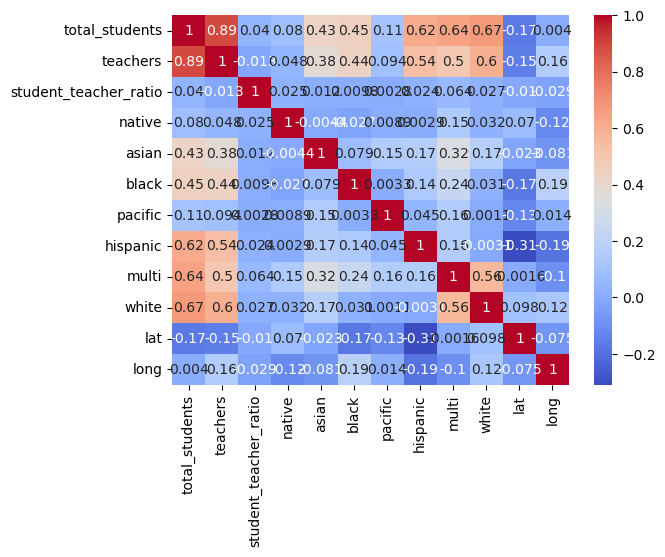

In [30]:
# Use seaborn to generate a correlation heatmap for the columns in the dataframe

corr_matrix = regular_schools.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')



## Geographic Plots

In [146]:
# Plot only schools from the 48 contiguous US states or the 50 US states (drop territories and PR)

regular_schools['state'].unique()
# List all values of 'state' to check for all included territories

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'OR', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY', 'UT', 'GU', 'PR', 'VI'], dtype=object)

<AxesSubplot:title={'center':'Regular-type schools in contiguous US'}, xlabel='long', ylabel='lat'>

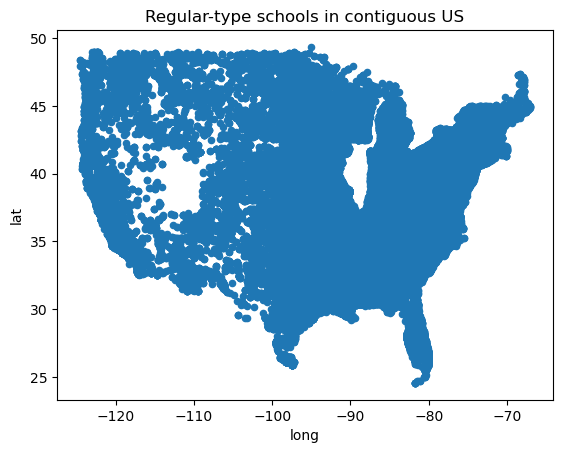

In [144]:
# Guam, the Virgin Islands, Puerto Rico, Alaska, and Hawaii are to be excluded to make a dataframe
# of the contiguous 48 states

contiguous48 = regular_schools.loc[(regular_schools.state != 'PR') & 
                                   (regular_schools.state != 'AK') &
                                   (regular_schools.state != 'HI') &
                                   (regular_schools.state != 'GU') &
                                   (regular_schools.state != 'VI')
                                  ]
contiguous48.plot(x = 'long', y = 'lat', kind = 'scatter', title = 'Regular-type schools in contiguous US')

In [151]:
# What's going on in IL?
# Start with uncleaned data, extract IL data, redo each step of cleaning and check for anomalies at each step

# Does IL have schools that other states would call 'regular' recorded as a type other than 'regular'?

il_schools = data_w_location.loc[data_w_location.state == 'IL']
il_schools.value_counts('school_type')

school_type
Regular school                  3877
Alternative Education School     251
Special education school         219
Career and Technical School       37
dtype: int64

In [149]:
# Does IL have schools that other states would call 'regular' recorded as a type other than 'regular'?

il_schools.value_counts('school_type')

school_type
Regular school                  3877
Alternative Education School     251
Special education school         219
Career and Technical School       37
dtype: int64

In [69]:
# Does IL regular school data have nulls that were cleaned out?

il_regular_schools = il_schools[il_schools['school_type'] == "Regular school"]
il_regular_schools.isnull().sum()

# Numnber of 'teacher' nulls in 'il_regular_schools' is same as total regular shools in 'il_schools'

state                       0
school_level                0
school_type                 0
total_students             26
teachers                 3877
student_teacher_ratio       0
native                   2186
asian                    1148
black                     379
pacific                  2887
hispanic                  159
multi                     283
white                     196
lat                         0
long                        0
dtype: int64

<AxesSubplot:title={'center':'Regular-type schools in Hawaii'}, xlabel='long', ylabel='lat'>

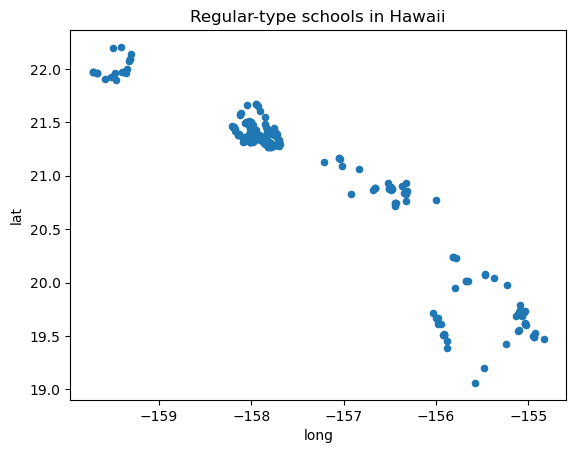

In [78]:
# Plot only schools in your state

hi_schools = regular_schools.loc[regular_schools.state == 'HI']
hi_schools.plot(x = 'long', y = 'lat', kind = 'scatter', title = 'Regular-type schools in Hawaii')

## School Quality Analysis: Student/Teacher Ratios

In [170]:
# Use the dataframe that has filtered out the outliers in Student Teacher Ratio and group by state and get the average
# Show the highest 5 Student/Teacher ratios and lowest 5 Student/Teacher ratios as well as the average for your state

state_grouped = regular_shools_strfilter.groupby('state').mean()


In [156]:
# What is the mean of the Student/Teacher Ratio
state_grouped['student_teacher_ratio'].mean()

14.475342801589127

In [157]:
# What is the standard deviation of the Student/Teacher Ratio
state_grouped['student_teacher_ratio'].std()

2.406063027988393

<AxesSubplot:xlabel='state'>

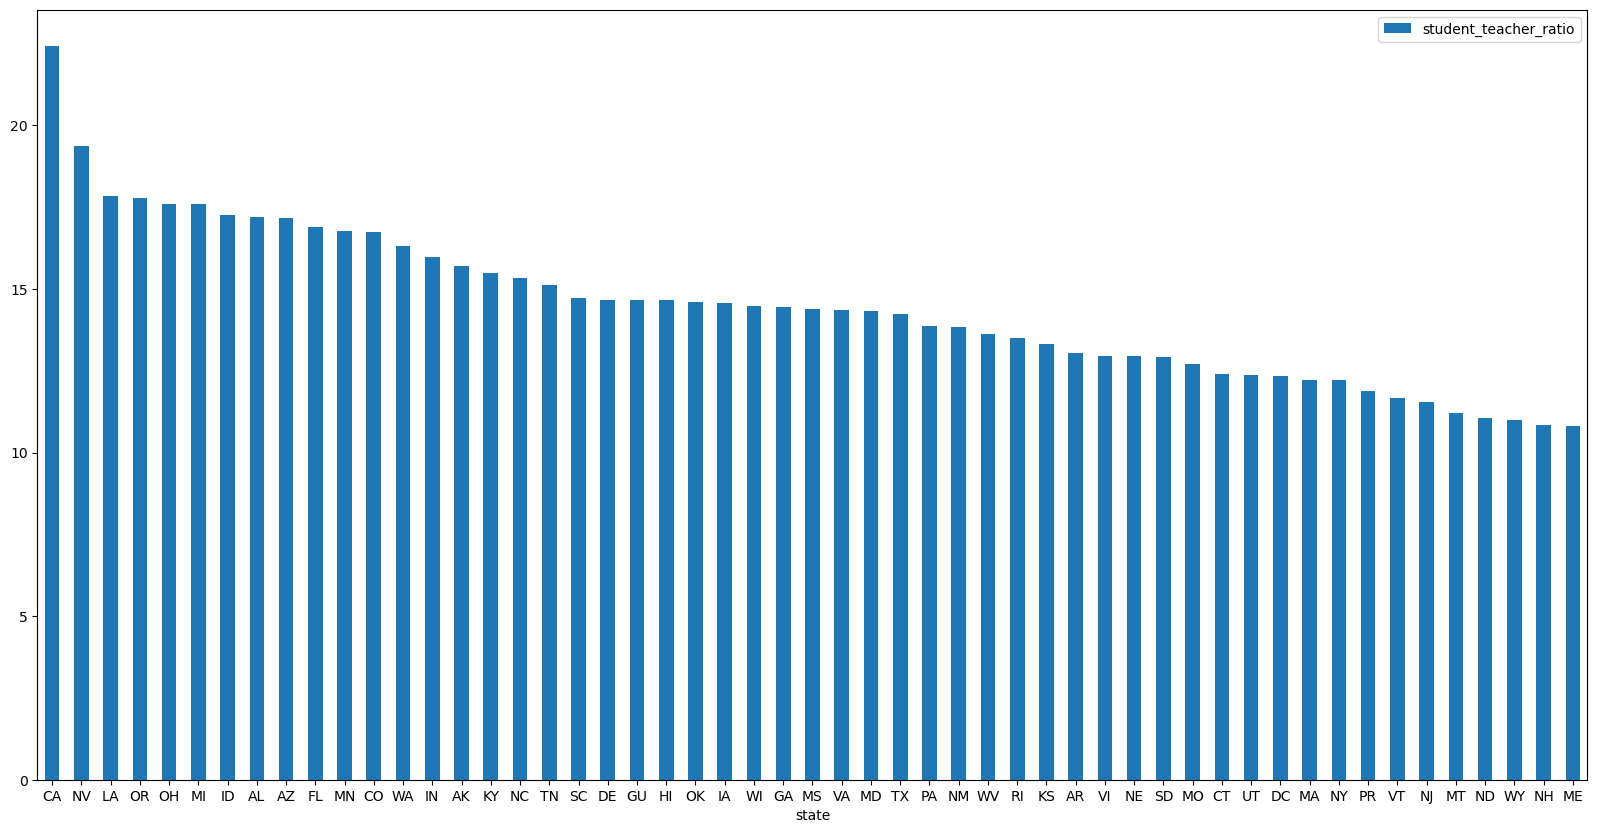

In [186]:
# Plot the states ratios in descending order
str_plot = state_grouped.sort_values(['student_teacher_ratio'], ascending = False)
str_plot.plot(kind='bar', y='student_teacher_ratio', rot=0, figsize=[20,10])



In [ ]:
# Plot a boxplot of the Student/Teacher Ratios
state_grouped['student_teacher_ratio'].plot(kind = 'box')

In [ ]:
# List or Plot the Highest 5 states

top_five = state_grouped.nlargest(5, columns = 'student_teacher_ratio')
top_five['student_teacher_ratio'].head()

In [ ]:
# List or plot the lowest 5

bottom_five = state_grouped.nsmallest(5, columns = 'student_teacher_ratio')
bottom_five['student_teacher_ratio']

In [160]:
# Print your state's Student Teacher Ratios

hi_schools['student_teacher_ratio']

school_id
150003000001    13.91
150003000002    13.33
150003000003    11.78
150003000004    12.24
150003000005    14.86
                ...  
150003000302    17.20
150003000303    16.18
150003000304    20.50
150003000305     8.93
150003000306    13.14
Name: student_teacher_ratio, Length: 292, dtype: float64

In [159]:
# The average Student Teacher Ratio for your state

hi_schools['student_teacher_ratio'].mean()

14.655239726027395

## Summarize your findings from any of the analysis or plots above:
* Were there any interesting Correlations?
    * Number of teachers was strongly positively correlated with number of each of white, multiracial, and hispanic students, somewhat positively with numbers of black and asian students, and weakly poitively if at all correlated with numbers of Hawaiian/pacific and native american students. The exact same trend holds for total number of students versus the racial groups, with no notable correlation of student-teacher ratio versus the racial groups. I really don't know what to make of this; small schools with the usual amount of teachers in Hawaii and high-native-population areas?
    * Number of teacher and total number of students are very strongly positively correlated, which should be obvious.
    * Number of hispanic students is somewhat negatively correlated with latitude, meaning there are more hispanic students in schools further south.
* How did your state compare to others?
* Would you have made any different decisions in the earlier cleaning stages after becoming more familiar with the data?
    * Box plots of filtered data show large amounts of outliers remaining for total students, teachers, and student-teacher ratios. However, the full ranges (~2400 max students, ~130 max teachers, ~1-35 range student-teacher ratio) are all within the realm of reason. Depending on what analysis the data were to be used for, I might drop student-teacher-ratio values below something like 10, as values below that would seem to be unusual situations like small one-room schools or tutoring groups.
* What is going on in IL?
    * In the raw data, the number of 'regular schools' for IL is the same as the number of null values for 'teachers' at 'regular schools'. In data cleaning, all IL regular schools were removed when null values for 'teachers' were dropped. Either IL does not record number of teachers at regular schools, or that data was removed sometime between data collection and 
* What other analysis could be done with this data?

## BONUS: Generate other interesting analysis or plots

In [ ]:
# Your code below
